This part is working to:
1. Gain a preliminary understanding of data
2. Merge the files

In [3]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import glob
# import seaborn as sns
# %matplotlib inline
from matplotlib_venn import venn3

In [3]:
file_paths=glob.glob("../data/*.csv")
print(file_paths)
data_budget=pd.read_csv(file_paths[0])
data_account=pd.read_csv(file_paths[1])
data_transaction=pd.read_csv(file_paths[2])

['../data/Data_budget.csv', '../data/Data_account.csv', '../data/Data_Transaction.csv']


## 1. Analyse data_budget

### 1.1 Preliminary analyse

In [5]:
data_budget.head()

,currency,budget,status,budget_cut_weekly,goal_id,wealth_growth,monthly_max_saving,budget_daily,feasible,budget_monthly,...,start_date,category,monthly_avg_income,amount,budget_cut_daily,current_goal_budget_cut_by_day,budget_weekly,snapshot,goal_name,remarks
0,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months
1,HKD,"{'Others': {'budget_weekly': 3.19084248957671,...",In progress,29.083871,83968004351,0.0,-167.438712,0.997204,False,29.916127,...,2021-05-15,Dining,154.561288,1000.000000,4.154839,4.154839,6.980430,{'monthly': {'budget_monthly': 29.916126709677...,cheaper food,NaN
2,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months
3,HKD,"{'Others': {'budget_weekly': 3.19084248957671,...",In progress,29.083871,83968004351,0.0,-167.438712,0.997204,False,29.916127,...,2021-05-15,Dining,154.561288,1000.000000,4.154839,4.154839,6.980430,{'monthly': {'budget_monthly': 29.916126709677...,cheaper food,NaN
4,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months


In [ ]:
data_budget.columns

In [ ]:
data_budget.describe()

In [ ]:
data_budget.info()

### key takeaway for this section: 
1. no null/missing value(remarks has some null field, but irrelevant)
2. 4472 rows, 31 columns
3. dtypes: bool(1), float64(15), int64(3), object(12)


### 1.2 Analyse catogorical columns

In [37]:
catg_bgt=data_budget.select_dtypes(include=['object']).columns
catg_bgt

Index(['currency', 'budget', 'status', 'psid', 'created_at', 'due_date',
       'updated_at', 'start_date', 'category', 'snapshot', 'goal_name',
       'remarks'],
      dtype='object')

#### 1.2.1 see the details of some import columns

In [11]:
print(len(pd.unique(data_budget['psid'])))
print(len(data_budget))

1287
4472


In [4]:
for c in ['currency',  'status',  'category',  'goal_name','remarks']:
    print(c)
    print(data_budget[c].value_counts(),"\n")

currency
HKD    3654
USD     818
Name: currency, dtype: int64 

status
In progress    3053
Completed      1149
Failed          270
Name: status, dtype: int64 

category
Dining           1356
Saving           1088
Education         609
Home / Family     540
Leisure           339
Healthcare        270
Property          270
Name: category, dtype: int64 

goal_name
Emergency Fund                    818
oreo                              339
kakin                             270
again                             270
iekairitai                        270
goal                              270
Target12 - mc                     270
oeas                              270
asdf                              270
testing                           270
goal1                             270
add a infeasible how              270
test                              270
high                               69
oreo journey May 14                69
oreo journey impossible May 14     69
cheaper food                

### key takeaway for this section: 
Group by usid, do the average
1. convert the currency to HKD
2. convert the status to "In progress","Completed","Failed"
3. convert category to 'Dining', 'Saving', 'Education', 'Home / Family', 'Leisure', 'Healthcare', 'Property'
4. Drop goal_name, remark

#### 1.2.2 closer look into budget,snapshot(str to dict)

In [12]:
# Take the first row as an example
import json
def extract(string):
    string=string.replace("\'","\"")
    string=string.replace("True","1")
    string=string.replace("False","0")
    convertedDict = json.loads(string)
    return convertedDict

def cvt_dict(convertedDict,indent=0):
    for key in convertedDict:
        if type(convertedDict[key]) is dict:
            print((" ")*indent, key)
            cvt_dict(convertedDict[key],indent+2)
        else:
            print((" ")*indent,key,convertedDict[key])
            
str_budget=data_budget.iloc[0:1]['budget'].values.tolist()[0]
str_snapshot=data_budget.iloc[0:1]['snapshot'].values.tolist()[0]
budget_dict=extract(str_budget)
snapshot_dict=extract(str_snapshot)

In [16]:
# check the budget_dict
for key in budget_dict:
    print(key,budget_dict[key],"\n")

Others_weekly, Others_monthly, Others_daily
Leisure_weekly, Leisure_monthly, Leisure_daily
Transportation_weekly, Transportation_monthly, Transportation_daily
Financials_weekly, Financials_monthly, Financials_daily
Dining & Beverage_weekly, Dining & Beverage_monthly, Dining & Beverage_daily
Healthcare_weekly, Healthcare_monthly, Healthcare_daily
Shopping_weekly, Shopping_monthly, Shopping_daily
Home_weekly, Home_monthly, Home_daily



In [ ]:
# check the snapshot_dict
cvt_dict(snapshot_dict)

In [ ]:
# Question: what is snapshot? the monthly,quarterly,weekly seem to be same 
def split_snapshot(ss):
    ss=ss[1:-1].replace("\'monthly\': ","\n")
    ss=ss[1:].replace("\'quarterly\': ","\n")
    ss=ss.replace("\'weekly\': ","\n")
    arr=ss.split("\n")
    if arr[0]==arr[1] and arr[0][:-2]==arr[2]:
        return True
    else:
        return False
    
cnt=0
l=len(data_budget['snapshot'])
for ele in data_budget['snapshot']:
    if split_snapshot(ele):
        cnt+=1
print('{:.2%} of the monthly,quarterly,weekly budge in snapshot is the same'.format(cnt/l))

In [ ]:
# Question: Difference between monthly data of snapshot and budget_dict
set1=snapshot_dict['monthly'].keys()
set2=set(data_budget.columns.values)
intc=set1&set2
print(set1-intc)
print(set2-intc)

### key takeaway for this section: 
1. most monthly,quarterly,weekly budge in snapshot is the same
2. snapshot do not give addition info
3. drop snapshot and so on
4. convert budget_dict to these attribute:

Others_weekly, Others_monthly, Others_daily
Leisure_weekly, Leisure_monthly, Leisure_daily
Transportation_weekly, Transportation_monthly, Transportation_daily
Financials_weekly, Financials_monthly, Financials_daily
Dining & Beverage_weekly, Dining & Beverage_monthly, Dining & Beverage_daily
Healthcare_weekly, Healthcare_monthly, Healthcare_daily
Shopping_weekly, Shopping_monthly, Shopping_daily
Home_weekly, Home_monthly, Home_daily

In [ ]:
whole_str_budget=data_budget['budget'].values.tolist()
detail_dict=dict()
i=0
for single_str_budget in whole_str_budget:
    single_budget_dict=extract(single_str_budget)
    for key in single_budget_dict:
        dd=single_budget_dict[key]
        for ele in ['_weekly','_monthly','_daily']:
            name=key+ele
            if name not in detail_dict.keys():
                value=[]
            else:
                value=detail_dict[name]
            value.append(dd['budget'+ele])
            detail_dict[name]=value

### 1.3 Analyse numerical columns

In [19]:
cs=data_budget.select_dtypes(exclude=['object']).columns
print(cs)

In [ ]:
data_budget.iloc[0:1][cs]

### key takeaway for this section: 
1. drop goal_id
2. convert feasible columns to catogory

### 1.4 Clear the Data base on Takeaways

#### 1.4.1 do the conversion

In [ ]:
def get_ratio(c_type):
    if c_type=="HKD":
        return 1
    elif c_type=="USD":
        return 7.8
    elif c_type=="EUR":
        return 9.2
    elif c_type=="CNY":
        return 1.2
    elif c_type=="JPY":
        return 0.07
    elif c_type=="GBP":
        return 10.7

In [ ]:
cs=cs.drop(['feasible'])

def curreny_conversion(arrLike):  
    ratio = get_ratio(arrLike['currency'])
    arrLike[cs]*=ratio
    return arrLike

data_budget = data_budget.apply(curreny_conversion,axis=1)

In [ ]:
cvt_status=pd.get_dummies(data_budget.status)
cvt_category=pd.get_dummies(data_budget.category)
data_budget.drop(['status','category','currency'],axis=1,inplace=True)

In [ ]:
for kk in detail_dict:
    print(kk)
    data_budget[kk]=np.array(detail_dict[kk])

In [ ]:
data_budget.drop(['goal_id','budget', 'created_at', 'due_date', 'updated_at', 'start_date',
       'snapshot', 'goal_name', 'remarks'],axis=1,inplace=True)

In [ ]:
data_budget = data_budget.join(cvt_status)
data_budget = data_budget.join(cvt_category)

In [ ]:
data_budget.select_dtypes(include=['object']).columns

In [ ]:
data_budget.select_dtypes(exclude=['object']).columns

#### 1.4.2 Group the data

In [ ]:
budget_set=set(data_budget.columns)
account_set=set(data_account.columns)
transaction_set=set(data_transaction.columns)
v=venn3([budget_set, account_set,transaction_set])
v.get_label_by_id('A').set_text('data_budget')
v.get_label_by_id('B').set_text('data_account')
v.get_label_by_id('C').set_text('data_transaction')
plt.show()

In [ ]:
print(budget_set&account_set&transaction_set)

### key takeaway for this section: 
1. use psid to link three dataset

In [ ]:
df=data_budget.groupby('psid').mean()

In [ ]:
df.columns

In [ ]:
df.to_csv("out.csv",index=True)

## 2. Analyse data_account

### 2.1 Preliminary analyse

In [23]:
#take the first one as example
for i in data_account[0:1].columns:
    print(data_account[0:1][i].name,data_account[0:1][i].values)

psid ['customer_1']
account_id ['482625418285812233']
nature ['savings']
created_at ['2021-05-15T09:56:49Z']
balance_by_day ["{'2021-04-17': 7864.6, '2021-04-16': 7864.6, '2021-04-15': 7864.6, '2021-04-14': 7864.6, '2021-04-13': 7864.6, '2021-04-12': 7864.6, '2021-04-11': 7864.6, '2021-04-10': 7864.6, '2021-04-09': 6864.6, '2021-04-08': 6864.6, '2021-04-07': 6864.6, '2021-04-06': 6864.6, '2021-04-05': 6864.6, '2021-04-04': 6864.6, '2021-04-03': 8864.6, '2021-04-02': 8864.6, '2021-04-01': 7653.04, '2021-03-31': 9653.04, '2021-03-30': 9653.04, '2021-05-01': 10129.6, '2021-05-02': 8129.6, '2021-05-03': 8129.6, '2021-05-04': 8129.6, '2021-05-05': 8129.6, '2021-05-06': 8129.6, '2021-03-29': 9653.04, '2021-05-07': 8129.6, '2021-03-28': 9653.04, '2021-05-08': 8129.6, '2021-03-27': 9653.03, '2021-05-09': 8129.6, '2021-03-26': 9653.03, '2021-03-25': 10154.03, '2021-03-24': 10154.03, '2021-03-23': 10154.03, '2021-03-22': 10154.03, '2021-03-21': 10154.03, '2021-03-20': 10154.03, '2021-04-30': 101

In [ ]:
data_account.columns

In [ ]:
data_account.describe()

In [ ]:
data_account.info()

### 2.2 Analyse catogorical columns

In [24]:
data_account.select_dtypes(include=['object']).columns

Index(['psid', 'account_id', 'nature', 'created_at', 'balance_by_day',
       'currency_code', 'subtype', 'name', 'account_name', 'updated_at',
       'display_type', 'provider_name', 'connection_id', 'country_code',
       'type', 'card_type', 'next_payment_date', 'positions', 'expiry_date',
       'open_date'],
      dtype='object')

#### 2.2.1 see the details of some import columns

In [25]:
arr=[ 'nature', 'currency_code', 'subtype',  
       'display_type', 'provider_name', 'country_code',
       'type', 'card_type', 'positions']
for a in arr:
    print(a)
    print(data_account[a].value_counts(),"\n")

nature
savings        1449
account         529
credit_card     345
investment      276
card            230
insurance        46
Name: nature, dtype: int64 

currency_code
HKD    2047
USD     460
EUR     207
CNY      69
JPY      46
GBP      46
Name: currency_code, dtype: int64 

subtype
liquid_asset         2576
current_liability     253
illiquid_asset         46
Name: subtype, dtype: int64 

display_type
Saving Account     1449
Credit Card         575
Current Account     529
Crypto              230
Investment           46
Insurance            46
Name: display_type, dtype: int64 

provider_name
Hang Seng                    1035
HSBC                          667
Bank of China (Hong Kong)     414
Standard Chartered            322
Diginex                       230
Fake Bank with Image          207
Name: provider_name, dtype: int64 

country_code
HK       2438
equos     230
XF        207
Name: country_code, dtype: int64 

type
asset        2622
liability     253
Name: type, dtype: int64 

ca

#### 2.2.2 closer look into type

In [35]:
# list he customer has more than type > 2
arr=data_account.groupby('psid')["type"].agg('count')>2
customer=np.array(list(data_account.groupby('psid').groups.keys()))
customer[arr]

array(['customer_136', 'customer_201', 'customer_202', 'customer_203',
       'customer_204', 'customer_205', 'customer_206', 'customer_207',
       'customer_208', 'customer_209', 'customer_210', 'customer_211',
       'customer_212', 'customer_213', 'customer_214', 'customer_215',
       'customer_216', 'customer_217', 'customer_218', 'customer_219',
       'customer_220', 'customer_221', 'customer_5'], dtype='<U13')

In [32]:
# Is the liability negetive?
df=data_account[data_account['type']=='liability']
df2=data_account[data_account['type']=='asset']
print(df['balance'][0:5])
print(df2["balance"][0:5])

0     7629.60
1    44169.46
2     7629.60
3        0.00
4     7629.60
Name: balance, dtype: float64
48     -5581.90
66     -2016.13
96    -20882.17
122   -18990.05
128       -0.07
Name: balance, dtype: float64


### key takeaway for this section: 
1. convert Unit to HKD
2. convert nature to 5 features: savings, account, credit_card, investment,card,insurance
3. convert subtype to 3 features: liquid_asset, current_liability, illiquid_asset
4. convert type to 3 features: asset, liability, net worth= asset+liability(liability is negetive, asset is postive)
5. drop provider_name, country_code, positions, and so on

### 2.3 Analyse numerical columns

In [36]:
data_account.select_dtypes(exclude=['object']).columns

Index(['balance', 'credit_limit', 'available_amount', 'next_payment_amount'], dtype='object')

### 2.4 Clear the Data base on Takeaways

In [ ]:
def curreny_conversion(arrLike):  
    ratio = get_ratio(arrLike['currency_code'])
    arrLike[cs]*=ratio
    return arrLike

data_account = data_account.apply(curreny_conversion,axis=1)

In [ ]:
data_account.select_dtypes(include=['object']).columns

In [ ]:
cvt_nature=pd.get_dummies(data_account.nature)
cvt_subtype=pd.get_dummies(data_account.subtype)
data_account.drop(['nature','subtype','currency_code'],axis=1,inplace=True)

In [ ]:
data_account.drop(['account_id', 'created_at', 'balance_by_day','name',
       'display_type', 'provider_name', 'connection_id', 'country_code',
        'card_type', 'next_payment_date', 'positions', 'expiry_date',
       'open_date', 'account_name', 'updated_at'],axis=1,inplace=True)

In [ ]:
data_account.columns

In [ ]:
cvt_type=pd.get_dummies(data_account.type)
data_account.drop(['type'],axis=1,inplace=True)
data_account = data_account.join(cvt_nature)
data_account = data_account.join(cvt_subtype)
data_account = data_account.join(cvt_type)

In [ ]:
cols=data_account.select_dtypes(include=['uint8']).columns
for cc in cols:
    data_account[cc]=data_account[cc]*data_account['balance']

In [ ]:
# the liability value is negetive, so use sum is ok
df2=data_account.groupby('psid').sum()

In [ ]:
df2.head()

## 3. Analyse data_transaction

### 3.1 Preliminary analyse

In [40]:
for i in data_transaction[0:1].columns:
    print(data_transaction[0:1][i].name,data_transaction[0:1][i].values)

psid ['customer_1']
transaction_id [4.82625e+17]
account_id [4.83e+17]
created_at ['2021-05-15T09:56:49Z']
mode ['normal']
status ['posted']
currency_code ['HKD']
areix_category ['Financials']
updated_at ['2021-05-15T09:56:49Z']
account_name ['HKD Statement Savings - 585-898042-292 HKD']
made_on ['3/19/2021']
category ['transfer']
amount [1200.]
provider_name ['HSBC']
description ['FROM USER N31957683621(19MAR21)']
country_code ['HK']
merchant_id [nan]
merchant [nan]


In [39]:
data_transaction.columns

Index(['psid', 'transaction_id', 'account_id', 'created_at', 'mode', 'status',
       'currency_code', 'areix_category', 'updated_at', 'account_name',
       'made_on', 'category', 'amount', 'provider_name', 'description',
       'country_code', 'merchant_id', 'merchant'],
      dtype='object')

In [ ]:
data_transaction.describe()

In [ ]:
data_transaction.info()

### 3.2 Analyse catogorical columns

In [42]:
catg_tsc=data_transaction.select_dtypes(include=['object']).columns
catg_tsc

Index(['psid', 'created_at', 'mode', 'status', 'currency_code',
       'areix_category', 'updated_at', 'account_name', 'made_on', 'category',
       'provider_name', 'description', 'country_code', 'merchant_id',
       'merchant'],
      dtype='object')

#### 3.2.1 see the details of some import columns

In [43]:
arr=[  'mode', 'status', 'currency_code',
       'areix_category',  'category',
       'provider_name', 'country_code',
       'merchant']
for a in arr:
    print(a)
    print(data_transaction[a].value_counts(),"\n")

mode
normal      61548
transfer     2346
fee           345
Name: mode, dtype: int64 

status
posted     60513
pending     3726
Name: status, dtype: int64 

currency_code
HKD    63066
USD      897
EUR      276
Name: currency_code, dtype: int64 

areix_category
Transportation       20493
Dining & Beverage    17112
Financials           13731
Leisure               5175
Others                5106
Shopping              1794
Home                   621
Healthcare             207
Name: areix_category, dtype: int64 

category
taxi                        20493
food_and_dining             11385
transfer                     7939
hotel                        4347
uncategorized                3864
cafes_and_restaurants        3036
groceries                    2484
income                       1242
investment_income            1035
service_fee                  1032
travel                        828
clothing                      759
shopping                      759
fees_and_charges              628
ph

### key takeaway for this section: 
1. drop all catogory columns except 'mode','status','areix_category'
2. convert to HKD

### 3.3 Analyse numerical columns

In [45]:
data_transaction.select_dtypes(exclude=['object']).columns

Index(['transaction_id', 'account_id', 'amount'], dtype='object')

### key takeaway for this section: 
1. drop all catogory columns except 'amount'

### 3.4 Clear the Data base on Takeaways

In [ ]:
data_transaction.drop(['transaction_id', 'account_id'],axis=1,inplace=True)

In [ ]:
cs='amount'
data_transaction = data_transaction.apply(curreny_conversion,axis=1)

In [ ]:
cvt_areix_category=pd.get_dummies(data_transaction.areix_category)
data_transaction.drop(['created_at', 'status', 'updated_at', 'account_name', 'made_on',
       'category', 'provider_name', 'description', 'country_code',
       'merchant_id', 'merchant','mode','areix_category','currency_code'],axis=1,inplace=True)

In [ ]:
data_transaction.columns

In [ ]:
data_transaction=data_transaction.join(cvt_areix_category)

In [ ]:
cols=data_transaction.select_dtypes(include=['uint8']).columns
for cc in cols:
    data_transaction[cc]=data_transaction[cc]*data_transaction['amount']

In [ ]:
df3=data_transaction.groupby('psid').sum()

In [ ]:
df3.head()

## 4. Analyse dataset together

In [54]:
file_paths=(glob.glob("./*.csv"))
file_paths.sort();
print(file_paths)
df_budget=pd.read_csv(file_paths[0])
df_account=pd.read_csv(file_paths[1])
df_transaction=pd.read_csv(file_paths[2])

['./out.csv', './out2.csv', './out3.csv']


In [13]:
s1=set(df_budget['psid'])
s2=set(df_account['psid'])
s3=set(df_transaction['psid'])
print(len(s1),len(s2),len(s3))

1287 1334 1334


In [55]:
df_budget=df_budget.set_index('psid')
df_account=df_account.set_index('psid')
df_transaction=df_transaction.set_index('psid')

In [59]:
del_cumtomers=list(s2-s1)
df_account.drop(index=del_cumtomers,inplace=True)
df_transaction.drop(index=del_cumtomers,inplace=True)

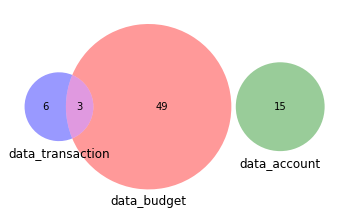

In [65]:
budget_set=set(df_budget.columns)
account_set=set(df_account.columns)
transaction_set=set(df_transaction.columns)
v=venn3([budget_set, account_set,transaction_set])
v.get_label_by_id('A').set_text('data_budget')
v.get_label_by_id('B').set_text('data_account')
v.get_label_by_id('C').set_text('data_transaction')
plt.show()

In [66]:
print(budget_set&transaction_set)

{'Leisure', 'Healthcare', 'amount'}


In [67]:
df_budget=df_budget.rename({'amount':'amount_bgt','Leisure':'Leisure_bgt','Healthcare':'Healthcare_bgt','Dining':'Dining_bgt', 
                            'Education':'Education_bgt' , 'Home / Family':'Home_bgt', 'Property':'Property_bgt'}, axis='columns')

In [68]:
df=df_account.join(df_budget)
df=df.join(df_transaction)

In [70]:
df.shape

(1287, 76)

In [71]:
df.to_csv("../data/clean_data.csv")